In [1]:
import numpy as np
from  scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import time 
%matplotlib notebook

In [9]:
###################
### Constants
L1 = 9.81   # m
g = 9.81  #m/s²
pi2 = 2*np.pi

def dXdt(X,t,g,L,):
    ders = np.zeros((2),np.double)
    ders[0] = X[1]
    ders[1] = -g/L*np.sin(X[0])
    return ders

#### IC
# Describe dynamics as
# X = [phi1,w1]

X0 = [1,0]

tmax=pi2
nt = 101
ts = np.linspace(0,tmax,nt)
pend1 = odeint(dXdt,X0,ts,args=(g,L1))

<IPython.core.display.Javascript object>


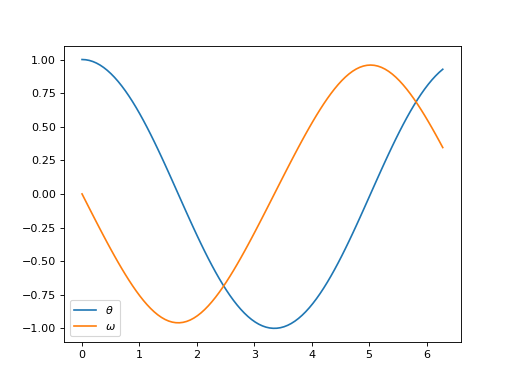

In [10]:
plt.figure()
plt.plot(ts,pend1[:,0],label=r'$\theta$')
plt.plot(ts,pend1[:,1],label=r'$\omega$')
plt.legend()


<IPython.core.display.Javascript object>


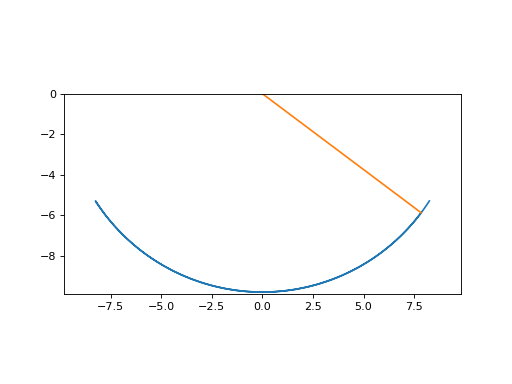

In [11]:
def plot(it):
    plt.cla()
    plt.plot(L1*np.sin(pend1[:it+1,0]),-L1*np.cos(pend1[:it+1,0]))
    plt.plot([0,L1*np.sin(pend1[it,0])],[0,-L1*np.cos(pend1[it,0])])
    
    plt.axis([-L1,L1,-L1*1.01,0])
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111,aspect='equal')
ani1 = anim.FuncAnimation(fig1,plot,frames = np.size(ts),
                         interval=100,repeat=False,blit=False)
# interval = milliseconds
plt.show()
# ani1.save('01_Plots/singlePendulum.gif', writer='imagemagick', fps=10)


## Double pendulum

<IPython.core.display.Javascript object>


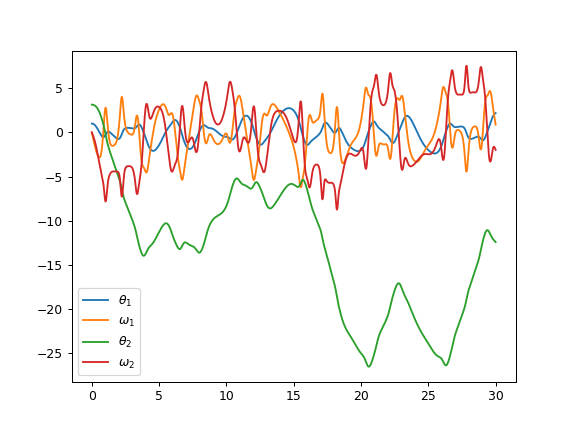

In [97]:
###################
### Constants
g = 9.81  #m/s²
pi2 = 2*np.pi

L1 = 1   # m
L2 = 1

m1 = 1
m2 = 1
M = m1+m2

def dXdt2(X,t,g,L1,L2,m1,m2,M):
    ders = np.zeros((4),np.double)
    S1 = np.sin(X[0])       ; C1 = np.cos(X[0])
    S2 = np.sin(X[2])       ; C2 = np.cos(X[2])
    S12 = np.sin(X[0]-X[2]) ; C12 = np.cos(X[0]-X[2]) ;
    prefac = 1/(1-m2/M*C12**2)
    
    ders[0] = X[1]
    ders[1] = (-M*g*S1 - m2*L2*S12*X[3]**2 + m2*g*S2*C12-m2*L1*X[1]**2*C12*S12)/(M*L1*prefac)
    ders[2] = X[3]
    ders[3] = (m2*g*C12*S1 + m2**2/M*L2*X[3]**2*S12*C12 - m2*g*S2 + m2*L1*X[1]**2*S12) / (m2*L2*prefac)
    return ders

#### IC
# Describe dynamics as
# X = [phi1,w1]

X0 = [1,0,np.pi,0]

tmax=30
nt = 1001
ts = np.linspace(0,tmax,nt)
pend2 = odeint(dXdt2,X0,ts,args=(g,L1,L2,m1,m2,M))

plt.figure()
plt.plot(ts,pend2[:,0],label=r'$\theta_1$')
plt.plot(ts,pend2[:,1],label=r'$\omega_1$')
plt.plot(ts,pend2[:,2],label=r'$\theta_2$')
plt.plot(ts,pend2[:,3],label=r'$\omega_2$')

plt.legend()


<IPython.core.display.Javascript object>


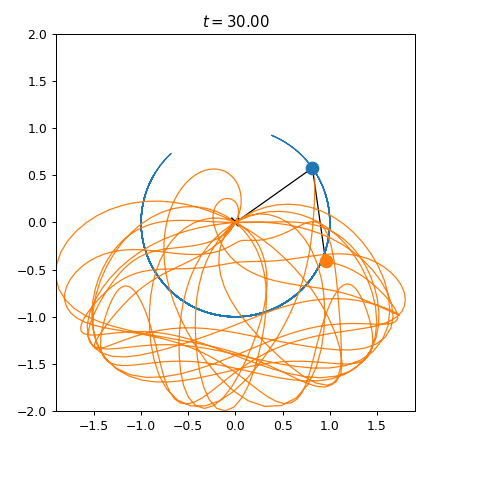

In [99]:
x1 = L1*np.sin(pend2[:,0])
y1 = -L1*np.cos(pend2[:,0])
x2 = x1 + L2*np.sin(pend2[:,2])
y2 = y1 - L2*np.cos(pend2[:,2])
xm = max(np.max(np.abs(x1)),np.max(np.abs(x2)))
ym = max(np.max(np.abs(y1)),np.max(np.abs(y2)))


def plot2(it):
    plt.cla()
    plt.plot([0],[0],'xk',ms=6,mew=2)
    plt.plot([0,x1[it],x2[it]],[0,y1[it],y2[it]],'k',lw=1)
    
    plt.plot(x1[:it+1],y1[:it+1],'C0',lw=1)
    plt.plot(x1[it],y1[it],'C0',marker='o',ms=10*m1)
    
    plt.plot(x2[:it+1],y2[:it+1],'C1',lw=1)
    #plt.plot([x1[it],x2[it]],[y1[it],y2[it]],'C1',lw=4)
    plt.plot(x2[it],y2[it],'C1',marker='o',ms=10*m2)
    
    plt.title(r'$t=%.2f$'%ts[it])
    plt.axis([-xm,xm,-ym,ym])
    plt.tight_layout()
    

fig2 = plt.figure(figsize=(5,5))
ax2  = fig2.add_subplot(111,aspect='equal')
tsep = int(nt/100)
ani2 = anim.FuncAnimation(fig2,plot2,frames = np.arange(0,nt,tsep),
                         interval=100,repeat=False)#,blit=False)
# interval = milliseconds
plt.show()


In [101]:
ani2.save('01_Plots/doublePendulum.gif', writer='imagemagick', fps=10,dpi=100)


In [77]:
ani2.save('01_Plots/doublePendulum.mp4', writer='ffmpeg', fps=10,dpi=100)


![SegmentLocal](01_Plots/doublePendulum2.gif "segment")